In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

In [3]:
from scripts.plot_timed_cuda import *

In [4]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.dpi'] = 400

In [5]:
timing_files64 = [
#    "../kiev0/results/cuda/out/2021-11-10T15:07:31,019910460+0900.out", # nvcc old
#    "../results/openmp/out/2021-11-10T15:15:35,626196546+09:00.out", # openmp 64 old
#    "../results/cuda/out/2021-11-10T15:16:19,157033767+09:00.out", # cpucuda 64 old
    "../kiev0/results/cuda/out/2021-12-06T18:50:57,497711605+0900.out", # nvcc
    "../results/openmp/out/2021-12-06T18:11:23,266134850+09:00.out", # openmp 64
    "../results/cuda/out/2021-12-06T18:41:04,856059379+09:00.out", # cpucuda 64
#    "../results/cuda/out/2021-12-10T12:05:33,390547016+09:00.out", # polygeist 64
#    "../results/cuda/out/2022-01-07T10:31:57,402269515+09:00.out", # polygeist 64
    "../results/cuda/out/2022-01-19T10:49:28,933863837+09:00.out", # polygeist 64
]

In [6]:
timing_files4 = [
    "../kiev0/results/cuda/out/2021-12-06T18:50:57,497711605+0900.out", # nvcc
    "../results/openmp/out/2021-12-06T19:12:14,180214691+09:00.out", # openmp 64
    "../results/cuda/out/2021-12-06T19:14:12,250351537+09:00.out", # cpucuda 64
#    "../results/timed_cuda/2021-11-10T09:11:06,931546865+09:00.out", # polygeist 64
]

In [7]:
timing_files2 = [
    "../kiev0/results/cuda/out/2021-12-06T18:50:57,497711605+0900.out", # nvcc
    "../results/openmp/out/2021-12-07T12:39:12,222705303+09:00.out", # openmp 64
    "../results/cuda/out/2021-12-07T10:51:01,431077239+09:00.out", # cpucuda 64
#    "../results/timed_cuda/2021-11-10T09:11:06,931546865+09:00.out", # polygeist 64
]

In [8]:
timing_files1 = [
    "../kiev0/results/cuda/out/2021-12-06T18:50:57,497711605+0900.out", # nvcc
    "../results/openmp/out/2021-12-06T19:18:55,721007603+09:00.out", # openmp 64
    "../results/cuda/out/2021-12-07T10:36:32,042610963+09:00.out", # cpucuda 64
#    "../results/timed_cuda/2021-11-10T09:11:06,931546865+09:00.out", # polygeist 64
]

In [23]:
def get_timing_summaries(file_list):
    return [create_file_timing_data_summary(read_timing_data_from_file(f), only_from=with_barriers) for f in file_list]
def get_timing_summaries_average(file_list):
    return [create_file_timing_data_summary(read_timing_data_from_files(f), only_from=with_barriers) for f in file_list]

timing_summaries_mincut = get_timing_summaries([
        *["../../rodinia/results/cuda/out/2021-12-06T18:50:57,497711605+0900.out"], # nvcc
        *get_last_n_files("../results/cuda/out/2022-03-12T23:10:02,591687789+09:00.out", 50), # polygeist loop distrib intel/48
        *get_last_n_files("../results/cuda/out/2022-03-13T03:42:11,141649247+09:00.out", 50), # polygeist loop distrib mincut intel/48 
        *get_last_n_files("../results/cuda/out/2022-03-13T14:12:10,494780011+09:00.out", 50), # polygeist continuation

    ])

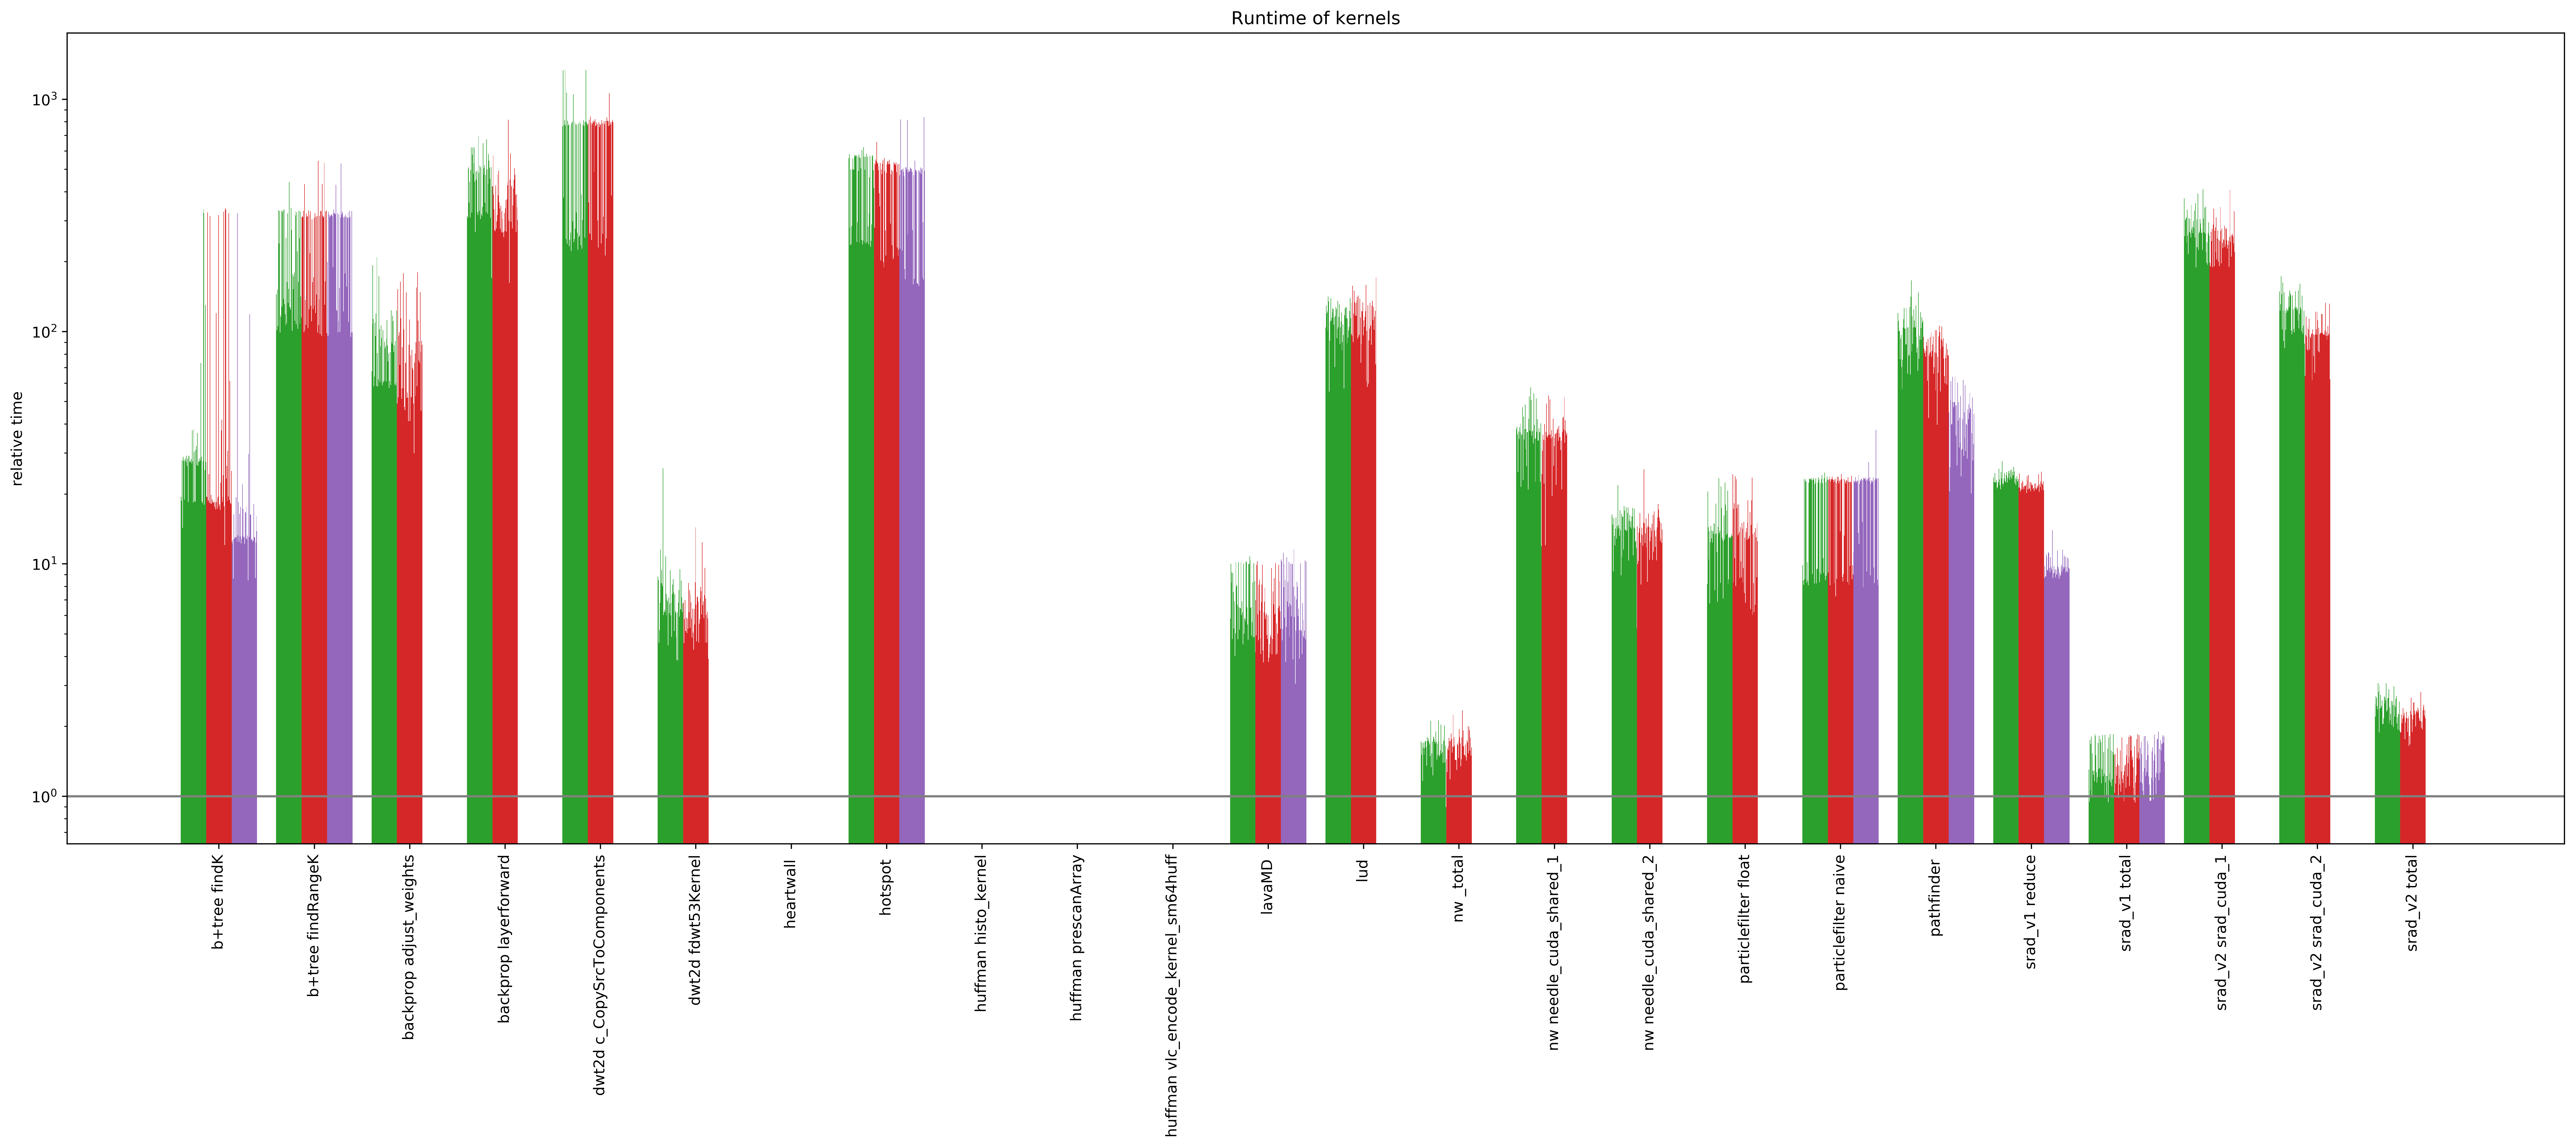

In [24]:
plot_summaries(timing_summaries_mincut, normalize=0, log_scale = True, draw_legend=False)

In [11]:
timing_files = timing_files64

In [12]:
timing_summaries = [create_file_timing_data_summary(read_timing_data_from_file(f)) for f in timing_files]

FileNotFoundError: [Errno 2] No such file or directory: '../kiev0/results/cuda/out/2021-12-06T18:50:57,497711605+0900.out'

In [ ]:
timing_summaries

In [ ]:
plot_summaries(timing_summaries, normalize=0)

In [ ]:
_timing_summaries = timing_summaries[:-1]

In [ ]:
legend = ['CUDA on NVIDIA A100', 'OpenMP on AMD EPYC 7302', 'cpucuda on AMD EPYC 7302']
plot_summaries(_timing_summaries, normalize=0, legend=legend)